In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout


## Load and Preprocess Data
Update the file path to point to your CSV file.

In [2]:
# Load the CSV file (update the file path as needed)
file_path = "Table2.csv"
df = pd.read_csv(file_path)


## Standardize and Clean Names


In [3]:
standard_names = {
    "Rollett": "Rollett", "Ma": "Ma", "Wong": "Wong", "Sun": "Sun",
    "Taheri-Mousavi": "Taheri-Mousavi", "Webler": "Webler", "Narra": "Narra",
    "Oskay": "Oskay", "Lewandowski": "Lewandowski", "Ghosh": "Ghosh",
    "Mahadevan & Karve": "Mahadevan & Karve", "SWRI": "SWRI", "Green": "Green"
}

def clean_name(name):
    name = str(name).strip().replace("\n", " ")
    for key in standard_names.keys():
        if key.lower() in name.lower():
            return standard_names[key]
    return name

# Convert all values to strings and handle missing values
df = df.fillna("")
donors = df.iloc[:, 0].astype(str).apply(clean_name)
recipients = df.iloc[:, 1].astype(str).apply(lambda x: [clean_name(name) for name in x.split("\n") if name.strip()])


## Create Weighted Adjacency Graph

In [4]:
G_weighted = nx.DiGraph()
weighted_edges = {}
for donor, rec_list in zip(donors, recipients):
    for recipient in rec_list:
        if donor and recipient:
            weighted_edges[(donor, recipient)] = weighted_edges.get((donor, recipient), 0) + 1

for (donor, recipient), weight in weighted_edges.items():
    G_weighted.add_edge(donor, recipient, weight=weight)


## Display Weighted Adjacency Matrix

In [5]:
adj_matrix = nx.to_pandas_adjacency(G_weighted, dtype=int)
display(adj_matrix)

,Ma,Lewandowski,SWRI,Rollett,Narra,Oskay,Ghosh,Sun,Taheri-Mousavi,Webler,Jaafar El-Awady (JHU),Guest Group,Jamie Guest (JHU),Harry Millwater (UTSA),Brendan Croom (JHU APL)
Ma,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lewandowski,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0
SWRI,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Rollett,1,1,0,0,0,0,2,0,0,2,0,0,0,0,0
Narra,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
Oskay,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
Ghosh,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
Sun,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
Taheri-Mousavi,3,0,0,1,0,0,1,1,0,0,0,0,0,0,0
Webler,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


## Force-Directed Graph Visualization

In [6]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_weighted, seed=42, k=0.5)
edges = G_weighted.edges(data=True)
weights = [d['weight'] for _, _, d in edges]

#nx.draw(G_weighted, pos, with_labels=True, node_size=2500, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold", arrows=True, width=weights)
#plt.title("Force-Directed Weighted Adjacency Graph", fontsize=14)
#plt.show()

<Figure size 1200x800 with 0 Axes>

## Hierarchical Graph Visualization
### How to use and better collect the information on donor-recipient exchanges

* Map collaborations – who is connected to whom in terms of data sharing, models, experiments, and validation
* Track data flow – what kind of data moves between groups, its format, and its usage
* Identify key dependencies – which groups or datasets are critical bottlenecks or central hubs
* Automate workflows – define relationships explicitly so that data transfer and model execution can be structured logically

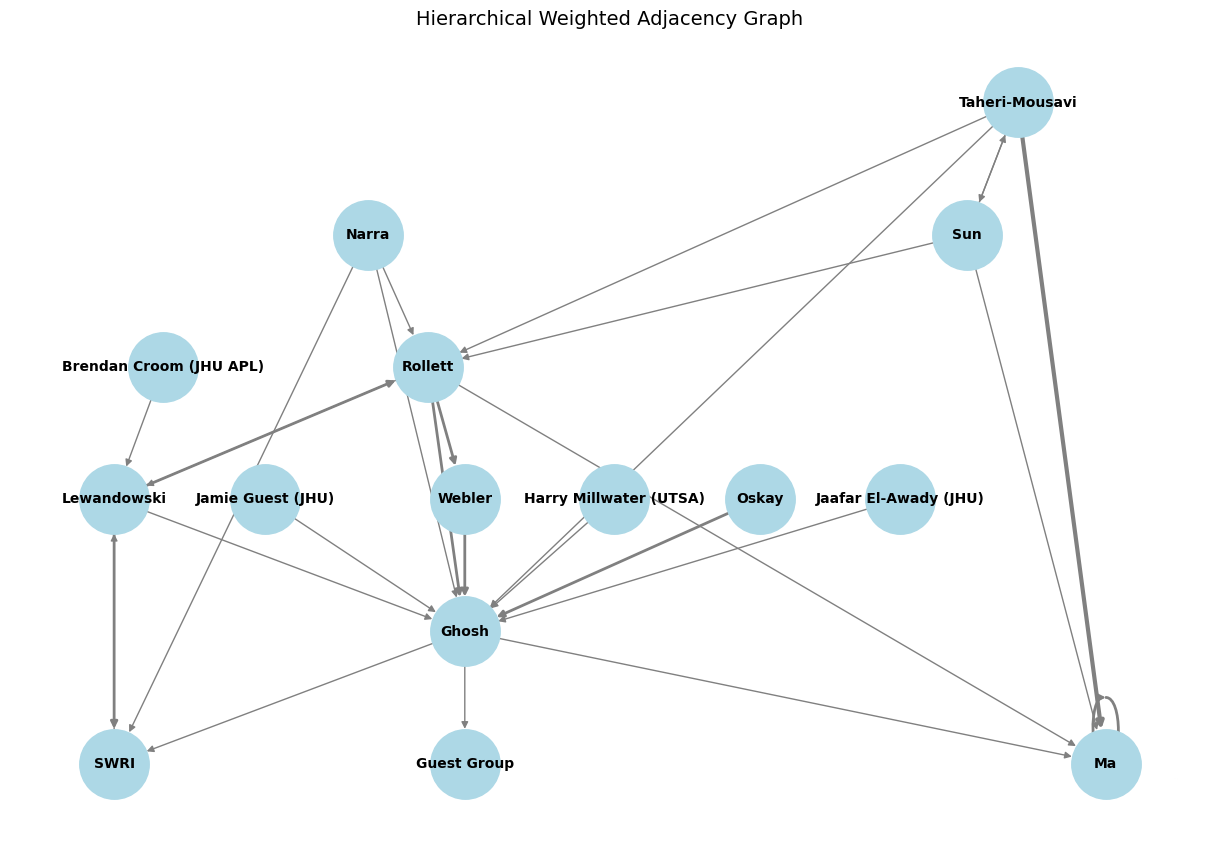

In [7]:
plt.figure(figsize=(12, 8))
pos_hierarchy = graphviz_layout(G_weighted, prog="dot")
nx.draw(G_weighted, pos_hierarchy, with_labels=True, node_size=2500, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold", arrows=True, width=weights)
plt.title("Hierarchical Weighted Adjacency Graph", fontsize=14)
plt.show()